# Disease Prediction Using Medical Data


In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Load the datasets
train_data = pd.read_csv('Training.csv')
test_data = pd.read_csv('Testing.csv')

In [23]:
# Drop the extraneous column if it exists
if 'Unnamed: 133' in train_data.columns:
    train_data = train_data.drop(columns=['Unnamed: 133'])

In [24]:
# Separate features and target variable from training data
X_train = train_data.drop(columns=['prognosis'])
y_train = train_data['prognosis']

In [25]:
# Separate features and target variable from testing data
X_test = test_data.drop(columns=['prognosis'])
y_test = test_data['prognosis']

In [26]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


In [28]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [29]:
# Save the trained model
model_filename = 'disease_prediction_model.pkl'
joblib.dump(model, model_filename)

['disease_prediction_model.pkl']

In [30]:
# Load the saved model
loaded_model = joblib.load(model_filename)

In [31]:
# Make predictions on the validation set
y_val_pred = loaded_model.predict(X_val)

In [32]:
# Evaluate the model on the validation set
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 1.0

Classification Report on Validation Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold 

In [33]:
# Make predictions on the test set
y_test_pred = loaded_model.predict(X_test_scaled)

In [34]:
# Evaluate the model on the test set
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9761904761904762

Classification Report on Test Set:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Co

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix on Test Set:")
print(conf_matrix)


Confusion Matrix on Test Set:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


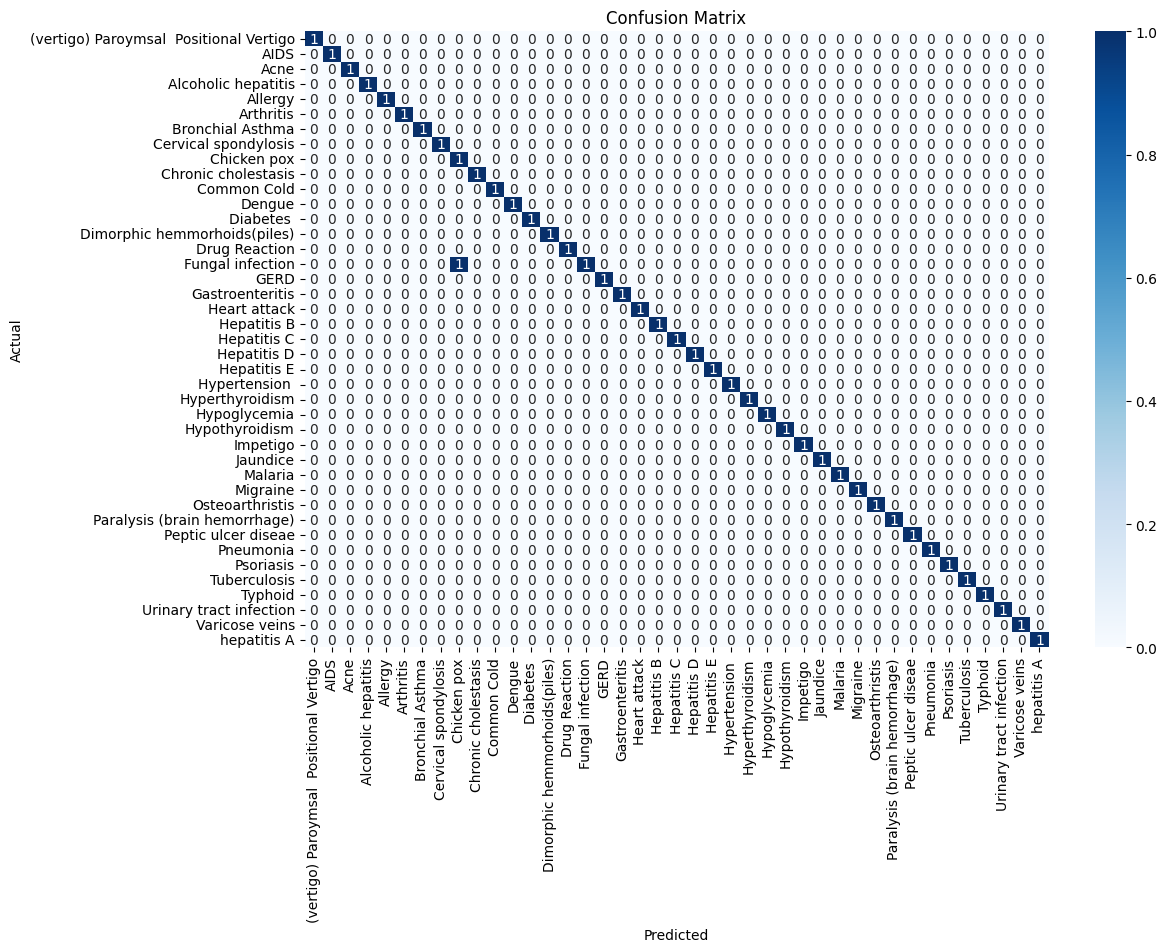

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Classification report as a dataframe for better visualization
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

C:\Users\racer\AppData\Local\Temp\ipykernel_2268\4223011130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df['f1-score'], palette='viridis')


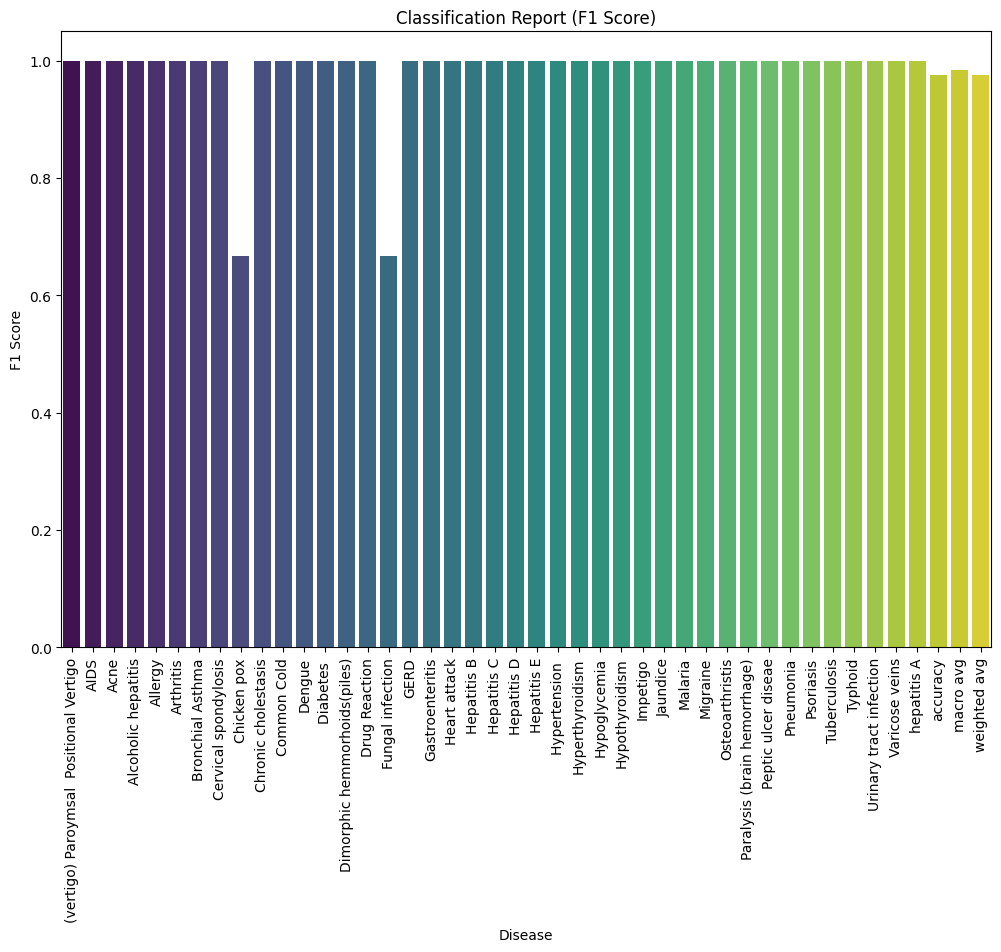

In [38]:
# Plotting the classification report
plt.figure(figsize=(12, 8))
sns.barplot(x=report_df.index, y=report_df['f1-score'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Disease')
plt.ylabel('F1 Score')
plt.title('Classification Report (F1 Score)')
plt.show()

# Multiple Models Comparision 